# In-Class Assignment L6-2:Monofilament

In [12]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [13]:
Monofilament_data = pd.read_excel('lect06-ancova.xlsx', sheet_name='Filament')
Monofilament_data

,Strength,Diameter,Machine
0,36,20,M1
1,41,25,M1
2,39,24,M1
3,42,25,M1
4,49,32,M1
5,40,22,M2
6,48,28,M2
7,39,22,M2
8,45,30,M2
9,44,28,M2


In [14]:
def codingfunc(x):
    if x == 'M1':
        return (1,0)
    elif x == 'M2':
        return (0,1)
    else:
        return (-1,-1)

Monofilament_data[['I1', 'I2']] = pd.DataFrame(Monofilament_data['Machine'].apply(codingfunc).tolist(), 
                                           index=Monofilament_data.index)
Monofilament_data.Diameter -= Monofilament_data.Diameter.mean()
Monofilament_data

,Strength,Diameter,Machine,I1,I2
0,36,-4.133333,M1,1,0
1,41,0.866667,M1,1,0
2,39,-0.133333,M1,1,0
3,42,0.866667,M1,1,0
4,49,7.866667,M1,1,0
5,40,-2.133333,M2,0,1
6,48,3.866667,M2,0,1
7,39,-2.133333,M2,0,1
8,45,5.866667,M2,0,1
9,44,3.866667,M2,0,1


In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


formula = 'Strength ~ C(Machine)'


Monofilament_lm = ols(formula, data=Monofilament_data).fit()
aov_table = anova_lm(Monofilament_lm) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Machine),2.0,140.4,70.200000,4.08932,0.044232
Residual,12.0,206.0,17.166667,NaN,NaN


### จากการทดสอบผลที่ได้คือ Machine ส่งผลต่อ response Strength เพราะค่า p-value = 0.044232 ซึ่งมีค่าน้อยกว่า 0.05

In [16]:
from statsmodels.formula.api import ols

formula = 'Strength ~ I1 + I2 + Diameter'
Monofilament_lm = ols(formula, data=Monofilament_data).fit()
Monofilament_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.897   
Dependent Variable: Strength         AIC:                59.9229 
Date:               2021-10-14 11:21 BIC:                62.7551 
No. Observations:   15               Log-Likelihood:     -25.961 
Df Model:           3                F-statistic:        41.72   
Df Residuals:       11               Prob (F-statistic): 2.66e-06
R-squared:          0.919            Scale:              2.5442  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     40.2000    0.4118  97.6109  0.0000  39.2935  41.1065
I1             0.1824    0.5950   0.3066  0.7649  -1.1272   1.4920
I2             1.2192    0.6201   1.9661  0.0750  -0.1456   2.5841
Diameter       0.9540    0.1140   8.3648  0.0000   0.7030   1.2050
-----------------------------------------------------------------
Omnibus:              0.909        Durbin-Watson:           1.931
Prob(Omnibus):        0.635        Jarque-Bera (JB):        0.818
Skew:                 0.463        Prob(JB):                0.664
Kurtosis:             2.327        Condition No.:           7    
=================================================================

"""

### จากการทำ test แบบมี covariate จะได้ว่า do not reject H0 (ค่า p-value < alpha 0.05) นั่นคือ ค่า machine ไม่ส่งผลต่อค่า response หรือทำให้ค่า Strength ที่ได้ไม่แตกต่างกัน

In [17]:
print('MSE (ANCOVA): {:.2f}'.format(Monofilament_lm.mse_resid))

MSE (ANCOVA): 2.54


In [18]:
def check_linreg_residuals(model):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(marker='o', s=70, alpha=0.5)
    sns2_kws = dict(marker='o', s=7, alpha=0.5)
    
    x = model.resid
    yhat = model.fittedvalues
    
    fig = plt.figure(figsize=(9, 7))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.scatter(yhat, x, **sns1_kws)
    ax1.set_title('Residuals vs. Fitted values')
    
    n=len(x)
    #sns.residplot(np.linspace(1,n,n), x, ax=ax2, scatter_kws=sns1_kws)
    #ax2.set_title('Sequence plot')
    ax2.scatter(yhat+x, yhat, **sns1_kws)
    ax2.set_title('Actual vs. Fitted values')
      
    # Box plot
    ax3.boxplot(x,showmeans=True)
    ax3.set_title('Boxplot')

    # qq plot
    sm.graphics.qqplot(x,line='q', ax=ax4, **kws)
    ax4.set_title('Normal Q-Q plot')
    plt.tight_layout()

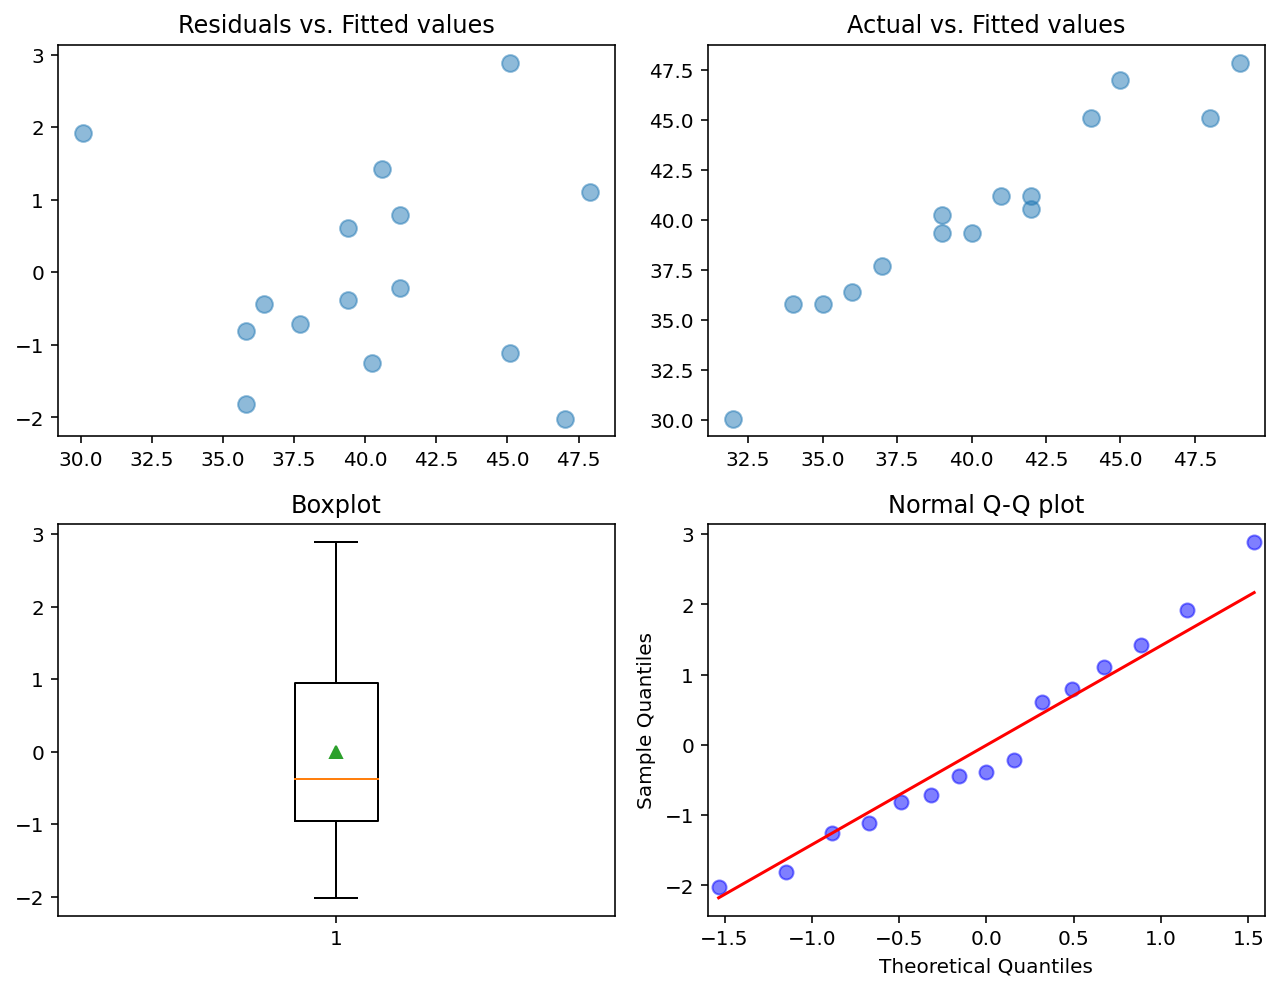

In [19]:
check_linreg_residuals(Monofilament_lm)

In [20]:
Monofilament_reduced_lm = ols('Strength ~ Diameter', data=Monofilament_data).fit()
Monofilament_reduced_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.872   
Dependent Variable: Strength         AIC:                61.7493 
Date:               2021-10-14 11:21 BIC:                63.1654 
No. Observations:   15               Log-Likelihood:     -28.875 
Df Model:           1                F-statistic:        96.12   
Df Residuals:       13               Prob (F-statistic): 2.26e-07
R-squared:          0.881            Scale:              3.1746  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     40.2000    0.4600  87.3831  0.0000  39.2061  41.1939
Diameter       1.0797    0.1101   9.8039  0.0000   0.8418   1.3177
-----------------------------------------------------------------
Omnibus:              0.495        Durbin-Watson:           1.387
Prob(Omnibus):        0.781        Jarque-Bera (JB):        0.362
Skew:                 0.331        Prob(JB):                0.834
Kurtosis:             2.623        Condition No.:           4    
=================================================================

"""

In [21]:
print('SSE_k (reduced model): {:.2f} '.format(Monofilament_reduced_lm.ssr))
print('SSE (full model): {:.2f} '.format(Monofilament_lm.ssr))
print('MSE (full model): {:.2f} '.format(Monofilament_lm.mse_resid))

SSE_k (reduced model): 41.27 
SSE (full model): 27.99 
MSE (full model): 2.54 


In [22]:
from scipy import stats
k=2
partial_F0 = ((Monofilament_reduced_lm.ssr-Monofilament_lm.ssr)/k)/Monofilament_lm.mse_resid
print('Test statistic: {:.2f}, P-value: {:.4f}'.format(partial_F0, 
                                                       stats.f.sf(partial_F0, k, Monofilament_lm.df_resid)))
print('Critical value at 0.05: {:.2f} '.format(stats.f.isf(0.05, k, Monofilament_lm.df_resid)))

Test statistic: 2.61, P-value: 0.1181
Critical value at 0.05: 3.98 


### จากการทดสอบ Partial F-test จะได้ค่า p-value = 0.1181 นั่นคือ do not reject H0  หรือสรุปได้ว่า main factor (Machine) ไม่ส่งผลต่อค่า response (Strength)


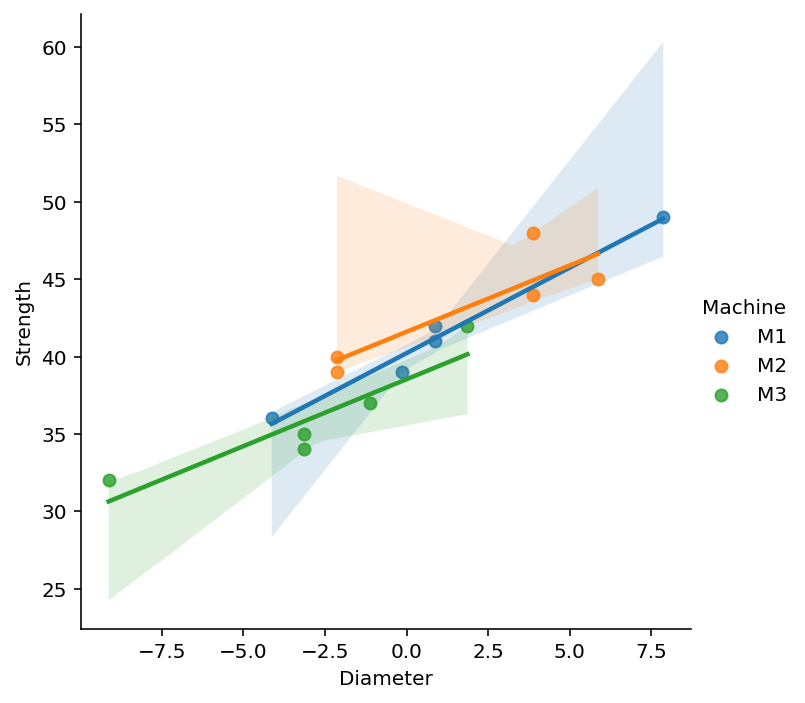

In [24]:
import seaborn as ans
sns.lmplot(data=Monofilament_data, x="Diameter", y="Strength", hue="Machine")

### สำหรับในการทำ anova ที่ให้ผลว่า treatment ให้ค่า response ต่างกันเนื่องจาก input ของ machine มีช่วง thickness(diameter) ที่ต่างกัน ทำให้ค่า strength แตกต่างกัน แต่เมื่อพิจารณาที่ค่า thickness เดียวกันจะได้ว่า ค่า strength ระหว่าง treatment ไม่ต่างกัน 
